**Welcome to HuliScam Automation V2** - This tool will help the user to count the total huliscam reports
1. Download the huliscam file here **(File > Create a Copy > Download a Copy**): [*Smart Report-a-SCAM Form.xlsx*](https://pldt365.sharepoint.com/:x:/r/sites/SmartSPAMReportingPortal/_layouts/15/Doc.aspx?sourcedoc=%7B4B128370-8D4D-4579-BACA-F2A4E30210F3%7D&file=Smart%20Report-a-SCAM%20Form.xlsx&fromShare=true&action=default&mobileredirect=true&wdOrigin=TEAMS-MAGLEV.p2p_ns.rwc&wdExp=TEAMS-TREATMENT&wdhostclicktime=1731669004661&web=1) (**Note**: Wait for it to be 100% synced)
2. Run the **script no.1**
3. Run the **script no.2**
4. At the bottom of the script no.2, upload the "**Smart Report-a-SCAM Form.xlsx**".
5. Enter the last **ID** and click the "**Run Script**" button
6. Run the **script no.3** (Optional: for manual scanning)

In [1]:
#Script no.1
import IPython
!pip install playwright
!playwright install
!pip install nest_asyncio
!pip install ipywidgets pandas openpyxl
IPython.display.clear_output()


--------------------------------------------------
⚠️ 18 Total HuliScam Reports since: June 13, 2025
✅ With link: 11
🗑️ No link: 7
🔁 Duplicate links: 2
🚫 Blocked/Pending link/s: <to be determined by the analyst>
🆖 Last ID in file: 12159

--------------------------------------------------


Link
http://smartcs.shop/rewards
https://smartcs.shop/rewards
https://postofficecz.sbs/ph
https://smartlh.shop/rewards
https://smartcc.qpon/rewards
https://bit.ly/3TiwczI
https://smartb.qpon/rewards
https://www.smarrtpromos.store/smart-thank-you?form_data_id=%228508b49a-1d8b-4894-819b-3d3ad9651ce4%22
https://smartcs.qpon/rewards



--------------------------------------------------
🕒 Please be patient, this may take some time depending on the number of URLs and API response times.

--- Processing URL 1/9: http://smartcs.shop/rewards ---
✅ Screenshot saved: screenshots/http___smartcs_shop_rewards_1.png
🕒 Submitted to URLScan.io. Scan UUID: 019766fd-94d1-729a-b418-592bdd7b2013. Waiting for results...
Waiting for URLScan.io report for http://smartcs.shop/rewards (attempt 1/10)...
✅ URLScan.io results fetched for http://smartcs.shop/rewards after 10 seconds.
✅ VirusTotal results fetched for domain: smartcs.shop.

--- Processing URL 2/9: https://smartcs.shop/rewards ---
✅ Screenshot saved: screenshots/https___smartcs_shop_rewards_2.png
🕒 Submitted to URLScan.io. Scan UUID: 019766fd-e682-7468-93ca-002b5880a497. Waiting for results...
Waiting for URLScan.io report for https://smartcs.shop/rewards (attempt 1/10)...
✅ URLScan.io results fetched for https://smartcs.shop/rewards after 10 seconds.
✅ VirusTotal results fetch


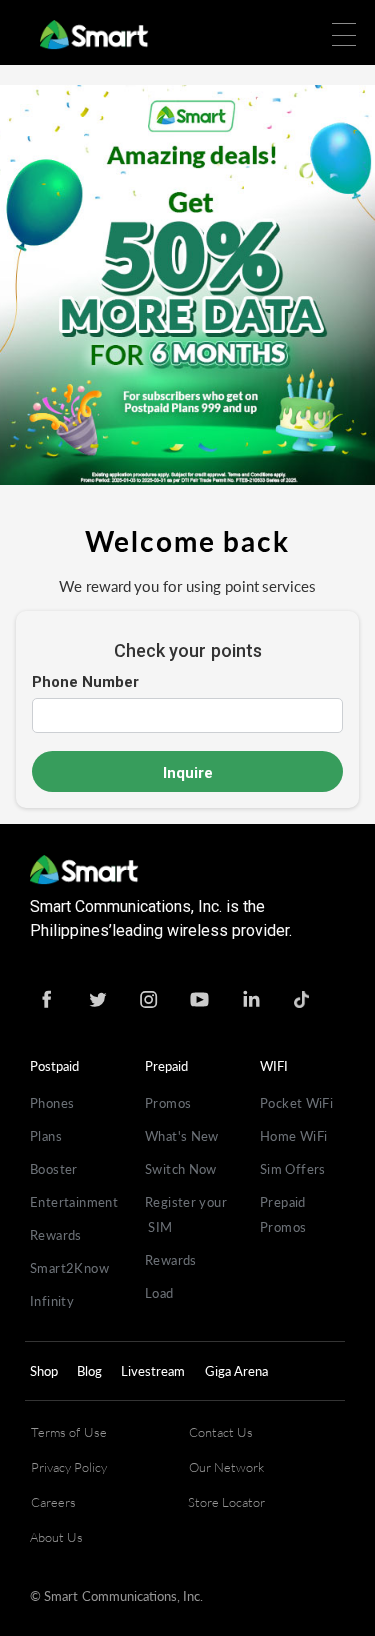
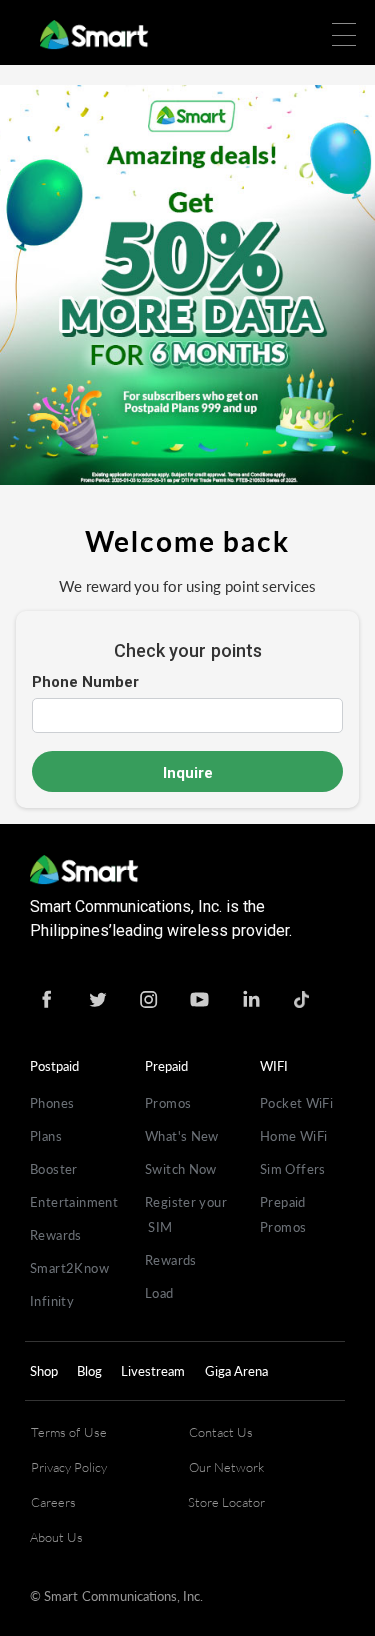
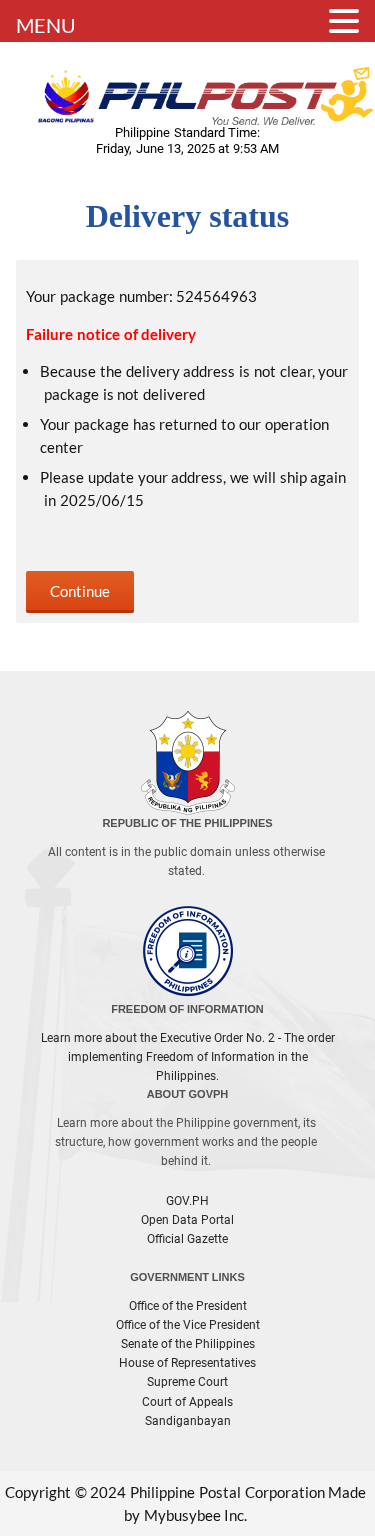
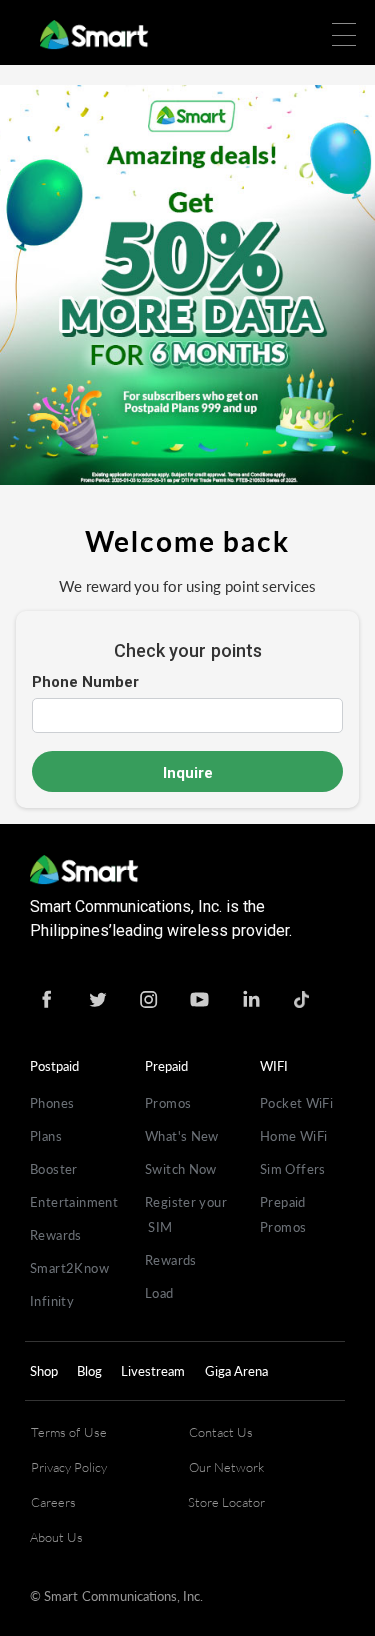
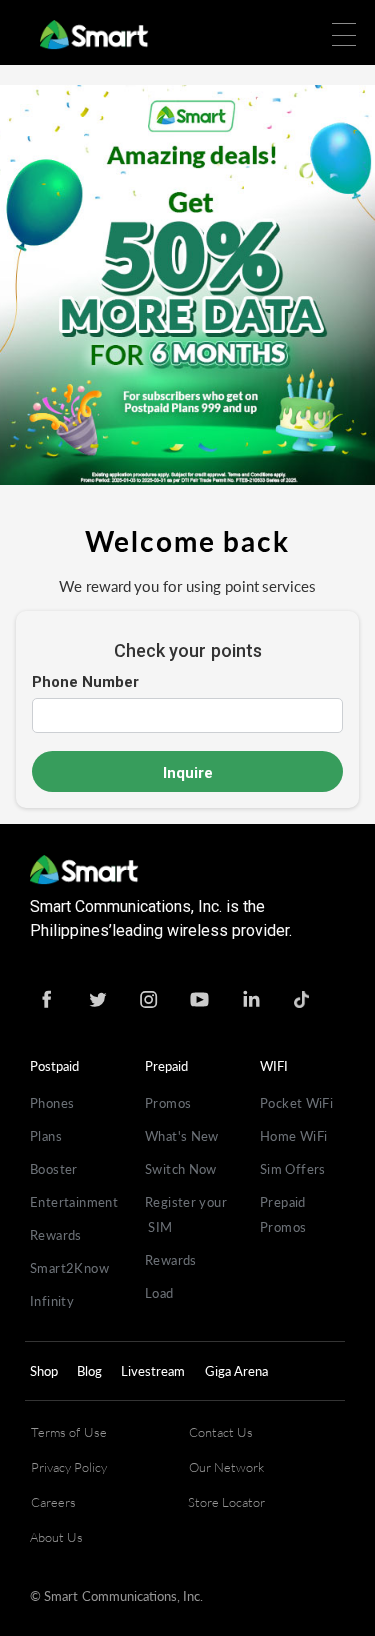
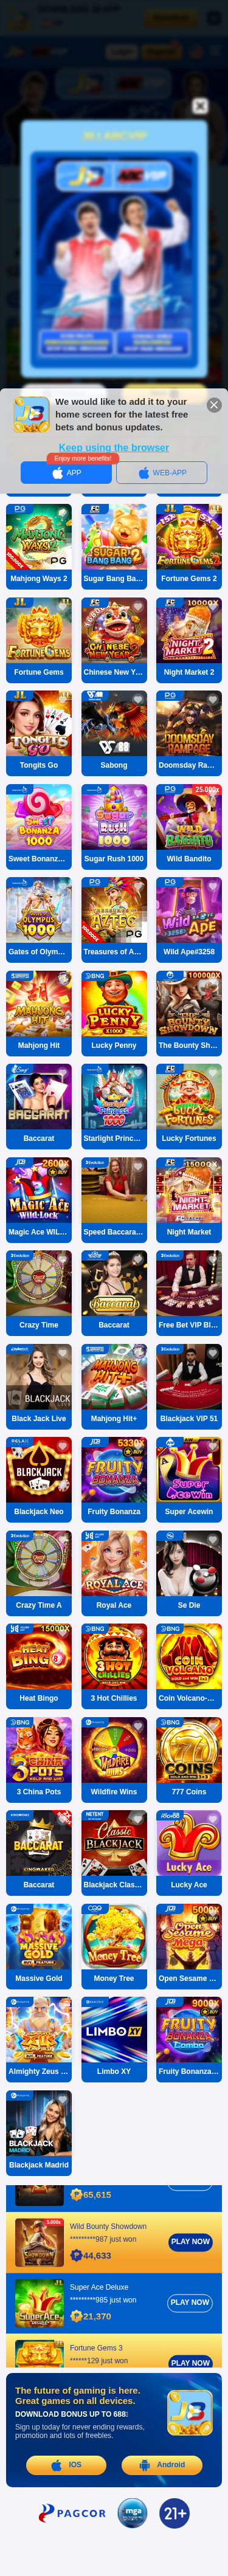
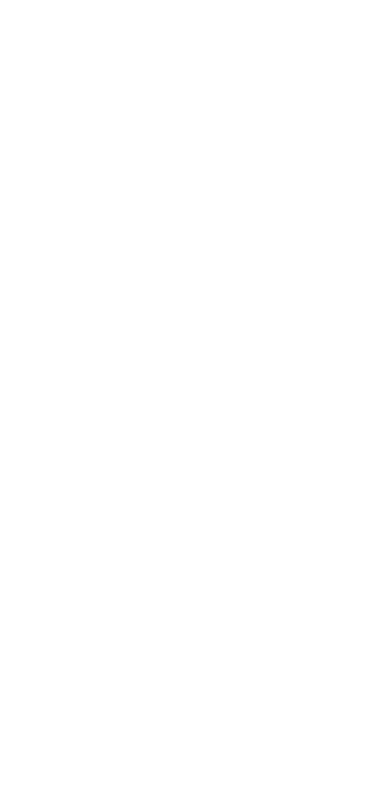
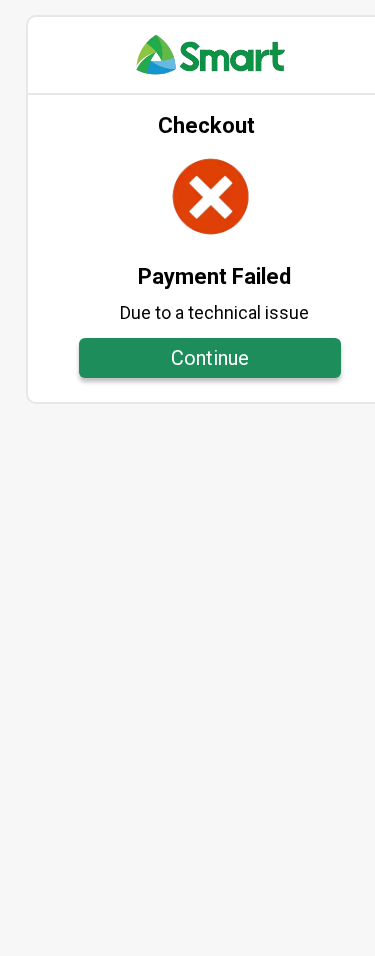
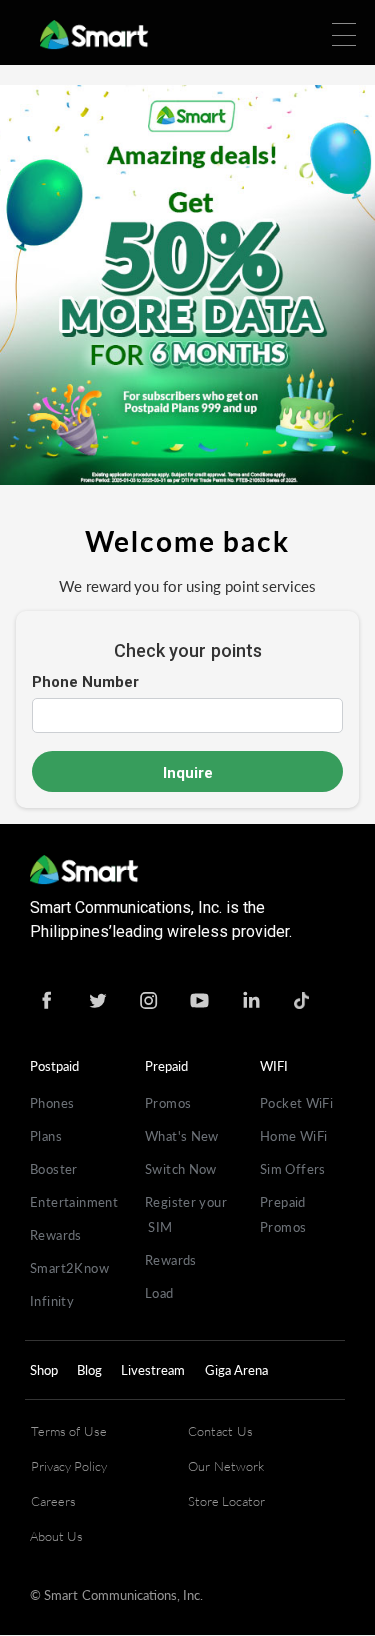


--------------------------------------------------

📄 successful_screenshots.csv:


Index,URL,Screenshot Path
1,http://smartcs.shop/rewards,screenshots/http___smartcs_shop_rewards_1.png
2,https://smartcs.shop/rewards,screenshots/https___smartcs_shop_rewards_2.png
3,https://postofficecz.sbs/ph,screenshots/https___postofficecz_sbs_ph_3.png
4,https://smartlh.shop/rewards,screenshots/https___smartlh_shop_rewards_4.png
5,https://smartcc.qpon/rewards,screenshots/https___smartcc_qpon_rewards_5.png
6,https://bit.ly/3TiwczI,screenshots/https___bit_ly_3TiwczI_6.png
7,https://smartb.qpon/rewards,screenshots/https___smartb_qpon_rewards_7.png
8,https://www.smarrtpromos.store/smart-thank-you?form_data_id=%228508b49a-1d8b-4894-819b-3d3ad9651ce4%22,screenshots/https___www_smarrtpromos_store_smart_thank_you_form_data_id__228508b49a_1d8b_4894_819b_3d3ad9651ce4_22_8.png
9,https://smartcs.qpon/rewards,screenshots/https___smartcs_qpon_rewards_9.png



--------------------------------------------------

📄 unsuccessful_screenshots.csv:
⚠️ unsuccessful_screenshots.csv is empty or malformed.

--------------------------------------------------

📄 urlscan_results.csv:


submitted_url,effective_url,ip,asn,country,uuid,result_link,status
http://smartcs.shop/rewards,https://smartcs.shop/rewards,104.21.2.104,"CLOUDFLARENET, US",NaN,019766fd-94d1-729a-b418-592bdd7b2013,https://urlscan.io/result/019766fd-94d1-729a-b418-592bdd7b2013/,Success
https://smartcs.shop/rewards,https://smartcs.shop/rewards,104.21.2.104,"CLOUDFLARENET, US",NaN,019766fd-e682-7468-93ca-002b5880a497,https://urlscan.io/result/019766fd-e682-7468-93ca-002b5880a497/,Success
https://postofficecz.sbs/ph,https://postofficecz.sbs/ph,43.159.146.36,"TENCENT-NET-AP-CN Tencent Building, Kejizhongyi Avenue, CN",US,019766fe-3a64-7168-b428-a00d47c0d665,https://urlscan.io/result/019766fe-3a64-7168-b428-a00d47c0d665/,Success
https://smartlh.shop/rewards,https://smartlh.shop/rewards,104.21.33.93,"CLOUDFLARENET, US",NaN,019766fe-8bd0-7194-8575-a9d63eba7d96,https://urlscan.io/result/019766fe-8bd0-7194-8575-a9d63eba7d96/,Success
https://smartcc.qpon/rewards,https://smartcc.qpon/rewards,104.21.9.21,"CLOUDFLARENET, US",NaN,019766fe-da93-7590-be43-f3d1a69f38cb,https://urlscan.io/result/019766fe-da93-7590-be43-f3d1a69f38cb/,Success
https://bit.ly/3TiwczI,https://www.j8ph33.com/?a=1&affiliateCode=php319,43.174.227.89,"ACE-AS-AP ACE, SG",SG,019766ff-2d4b-714d-bc70-9a38c190e908,https://urlscan.io/result/019766ff-2d4b-714d-bc70-9a38c190e908/,Success
https://smartb.qpon/rewards,https://smartb.qpon/rewards,104.21.82.57,"CLOUDFLARENET, US",NaN,019766ff-a8ba-7789-a9b5-7f4adb6f7d06,https://urlscan.io/result/019766ff-a8ba-7789-a9b5-7f4adb6f7d06/,Success
https://www.smarrtpromos.store/smart-thank-you?form_data_id=%228508b49a-1d8b-4894-819b-3d3ad9651ce4%22,https://www.smarrtpromos.store/smart-thank-you?form_data_id=%228508b49a-1d8b-4894-819b-3d3ad9651ce4%22,113.20.119.11,"CMCTELECOM-VN CMC Telecom Infrastructure Company, VN",VN,019766ff-f9c3-76a9-85bd-aafab9f94520,https://urlscan.io/result/019766ff-f9c3-76a9-85bd-aafab9f94520/,Success
https://smartcs.qpon/rewards,https://smartcs.qpon/rewards,104.21.112.1,"CLOUDFLARENET, US",NaN,01976700-4c82-7671-b77e-76d297a5e9c4,https://urlscan.io/result/01976700-4c82-7671-b77e-76d297a5e9c4/,Success



--------------------------------------------------

📄 virustotal_results.csv:


domain,status,id,status_code,malicious_hits,domain_name,creation_date,registrant_country
smartcs.shop,Success,smartcs.shop,200,0,smartcs.shop,2022-11-26 00:00:00,South Korea
smartcs.shop,Success,smartcs.shop,200,0,smartcs.shop,2022-11-26 00:00:00,South Korea
postofficecz.sbs,Success,postofficecz.sbs,200,1,POSTOFFICECZ.SBS,2025-06-12T08:06:59Z,"HK,CN"
smartlh.shop,Success,smartlh.shop,200,0,SMARTLH.SHOP,2019-06-22T12:04:09.0Z,KR
smartcc.qpon,Success,smartcc.qpon,200,0,NaN,NaN,NaN
bit.ly,Success,bit.ly,200,2,bit.ly,2008-05-17T22:00:00Z,US
smartb.qpon,Success,smartb.qpon,200,0,smartb.qpon,2025-06-02 00:00:00,Hong Kong
www.smarrtpromos.store,Success,www.smarrtpromos.store,200,0,smarrtpromos.store,2025-04-09 00:00:00,Iceland
smartcs.qpon,Success,smartcs.qpon,200,0,NaN,NaN,NaN



--- Generating PDF Report ---
✅ PDF Report generated successfully: HuliScam_Report_20250613_015617.pdf


In [20]:
import pandas as pd
import re
import io
from IPython.display import display, clear_output, HTML
from datetime import datetime
import ipywidgets as widgets
import asyncio
from playwright.async_api import async_playwright
import os
import nest_asyncio
import base64
from pandas.errors import EmptyDataError
import requests
import time
from google.colab import userdata

# Apply nest_asyncio to allow asyncio.run() in Jupyter/Colab environments
nest_asyncio.apply()

# --- Global Output Buffer for PDF Generation ---
output_buffer = []

def add_to_output_buffer(content):
    """Adds content (text or HTML) to the global buffer for PDF generation."""
    output_buffer.append(content)

def print_and_buffer(text):
    """Prints to console and adds as HTML paragraph to buffer."""
    print(text)
    add_to_output_buffer(f"<p>{text}</p>")

def display_and_buffer(obj):
    """Displays in notebook and adds HTML representation to buffer."""
    if isinstance(obj, pd.DataFrame):
        html_repr = obj.to_html(index=False)
        display(HTML(html_repr))
        add_to_output_buffer(html_repr)
    elif isinstance(obj, HTML):
        display(obj)
        add_to_output_buffer(obj.data)
    else:
        # For other displayable objects, convert to string and add as paragraph
        display(obj)
        add_to_output_buffer(f"<p>{str(obj)}</p>")

# --- 1. Upload Section (No change needed here for buffering) ---
upload_label = widgets.Label("\U0001F4C1 Upload the Smart HuliScam Report File:")
upload_widget = widgets.FileUpload(accept='.csv,.xls,.xlsx', multiple=False)
upload_row = widgets.HBox([upload_label, upload_widget])
display(upload_row)

# --- 2. Input + Controls (No change needed here for buffering) ---
id_input = widgets.Text(
    placeholder='Enter last ID',
    description='\U0001FAAA Last ID:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='200px')
)

preview_toggle = widgets.Checkbox(
    value=True,
    description='\U0001F4F8 Show Screenshot Previews',
    indent=False
)

preview_cols = widgets.IntSlider(
    value=2,
    min=1,
    max=2,
    step=1,
    description='Columns:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='200px')
)

run_button = widgets.Button(
    description="Run Script",
    button_style='success',
    icon='play'
)

input_controls = widgets.HBox([id_input, preview_toggle, preview_cols, run_button])
display(input_controls)

def on_button_click(b):
    global output_buffer # Declare intention to modify global buffer
    output_buffer.clear() # Clear buffer at the start of a new run
    clear_output(wait=True)
    display(upload_row, input_controls)

    add_to_output_buffer("<h1>HuliScam Report</h1>")
    add_to_output_buffer(f"<p>Report Generated: {datetime.now().strftime('%B %d, %Y %I:%M:%S %p')}</p>")

    if not upload_widget.value:
        print_and_buffer("\u26A0\uFE0F Please upload a file.")
        return
    if not id_input.value.strip().isdigit():
        print_and_buffer("\u26A0\uFE0F Please enter a valid numeric last ID.")
        return

    uploaded_file = next(iter(upload_widget.value.values()))
    content = uploaded_file['content']
    filename = uploaded_file['metadata']['name']

    try:
        if filename.endswith('.csv'):
            df = pd.read_csv(io.BytesIO(content), encoding='utf-8')
        elif filename.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(io.BytesIO(content))
        else:
            print_and_buffer("\u274C Unsupported file type. Please upload a .csv, .xls, or .xlsx file.")
            return
    except Exception as e:
        print_and_buffer(f"\u274C Failed to read file: {e}")
        return

    # Strip whitespace from string columns
    str_cols = df.select_dtypes(include='object').columns
    df[str_cols] = df[str_cols].apply(lambda col: col.str.strip() if col.notna().any() else col)

    # Determine the last ID from the uploaded dataframe
    try:
        last_id_series = df.iloc[:, 0].dropna()
        if last_id_series.empty:
            print_and_buffer("\u26A0\uFE0F The first column seems to be empty or contains no valid IDs.")
            return
        last_id = last_id_series.iloc[-1]
    except Exception:
        print_and_buffer("\u274C Could not determine the last ID from the uploaded file.")
        return

    # Calculate the next ID based on user input
    try:
        next_id_val = float(id_input.value.strip()) + 1
        next_id = str(next_id_val)
    except ValueError:
        print_and_buffer("\u274C Invalid ID format in input. Please enter a numeric value.")
        return

    # Find the starting index for new reports
    id_column_str = df.iloc[:, 0].astype(str)
    match_index = df[id_column_str == next_id].index

    if match_index.empty:
        print_and_buffer(f"\u26A0\uFE0F No new HuliScam report found starting from ID {int(next_id_val)}.")
        return

    start_idx = match_index[0]
    df_matched = df.loc[start_idx:].copy()

    total_reports = df_matched.iloc[:, 0].notna().sum()
    df_matched.to_csv("report.csv", index=False, encoding='utf-8-sig')

    # Extract links from the 20th column (index 19)
    link_column = df_matched.iloc[:, 19]
    link_regex = re.compile(r'(?i)\bhttps?://\S+')

    def extract_link(text):
        if pd.isna(text):
            return None
        match = link_regex.search(str(text))
        return match.group(0) if match else None

    links = link_column.apply(extract_link).dropna().reset_index(drop=True)
    links_df = links.to_frame(name='Link')
    links_df.to_csv('links.csv', index=False, encoding='utf-8-sig')

    unique_links_df = links_df.drop_duplicates()
    unique_links_df.to_csv('unique_link.csv', index=False, encoding='utf-8-sig')

    links_found = len(links)
    no_links = total_reports - links_found

    link_counts = links.value_counts()
    duplicates = link_counts[link_counts > 1]
    total_duplicates = int(duplicates.sum() - len(duplicates)) if not duplicates.empty else 0
    if not duplicates.empty:
        duplicates.to_frame(name='Count').to_csv('duplicates.csv', encoding='utf-8-sig')

    # --- Summary Section ---
    today = datetime.now().strftime("%B %d, %Y")
    print_and_buffer(f"\n{'-'*50}")
    add_to_output_buffer("<h2>\U0001F4CA HuliScam Report Summary</h2>")
    print_and_buffer(f"\u26A0\uFE0F {total_reports} Total HuliScam Reports since: {today}")
    print_and_buffer(f"\u2705 With link: {links_found}")
    print_and_buffer(f"\U0001F5D1\uFE0F No link: {no_links}")
    print_and_buffer(f"\U0001F501 Duplicate links: {total_duplicates}")
    print_and_buffer(f"\U0001F6AB Blocked/Pending link/s: <to be determined by the analyst>")
    print_and_buffer(f"\U0001F196 Last ID in file: {int(last_id)}")

    try:
        if not unique_links_df.empty:
            print_and_buffer(f"\n{'-'*50}")
            add_to_output_buffer("<h3>\U0001F517 All Unique Extracted Links:</h3>")
            display_and_buffer(unique_links_df)
        else:
            print_and_buffer(f"\n\u26A0\uFE0F No unique links found to display.")
    except Exception as e:
        print_and_buffer(f"\u274C Could not preview unique_link.csv: {e}")

    # --- URL Scanning (Playwright & URLScan.io) and VirusTotal Section ---
    try:
        df_links = pd.read_csv("unique_link.csv")
        urls_to_scan = df_links['Link'].dropna().drop_duplicates().tolist()
    except Exception as e:
        print_and_buffer(f"\u274C Failed to load unique_link.csv for scanning: {e}")
        urls_to_scan = []

    USER_AGENT = "Mozilla/5.0 (iPhone; CPU iPhone OS 17_7_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.3 Mobile/15E148 Safari/604.1"
    os.makedirs("screenshots", exist_ok=True)

    # --- Function to extract domain from URL (for VirusTotal) ---
    def extract_domain(url):
        domain = re.sub(r'^https?://', '', url).rstrip('/')
        return domain.split('/')[0]

    async def run_scans_and_screenshots():
        print_and_buffer(f"\n{'-'*50}")
        add_to_output_buffer("<h2>\U0001F552 Initiating URL scans, screenshot capture, and VirusTotal checks...</h2>")
        print_and_buffer("\U0001F552 Please be patient, this may take some time depending on the number of URLs and API response times.")

        if not urls_to_scan:
            print_and_buffer("\u26A0\uFE0F No URLs to scan.")
            return

        successful_screenshots = []
        unsuccessful_screenshots = []
        screenshot_previews = [] # This will now store base64 images

        urlscan_detailed_results = []
        virustotal_detailed_results = []

        # Get API keys securely
        URLSCAN_API_KEY = userdata.get('URLScan_API_key')
        VT_API_KEY = userdata.get('VT_API_Key')

        if not URLSCAN_API_KEY:
            print_and_buffer("\u274C URLScan.io API key not found. Please add 'URLScan_API_key' to Colab Secrets.")
            return
        if not VT_API_KEY:
            print_and_buffer("\u274C VirusTotal API key not found. Please add 'VT_API_Key' to Colab Secrets.")
            return

        urlscan_headers = {
            "Content-Type": "application/json",
            "API-Key": URLSCAN_API_KEY
        }
        virustotal_headers = {
            "accept": "application/json",
            "x-apikey": VT_API_KEY
        }

        async with async_playwright() as p:
            browser = await p.chromium.launch(headless=True)
            context = await browser.new_context(user_agent=USER_AGENT, viewport={"width": 375, "height": 812})
            page = await context.new_page()

            for idx, url in enumerate(urls_to_scan, start=1):
                print_and_buffer(f"\n--- Processing URL {idx}/{len(urls_to_scan)}: {url} ---")
                current_url_domain = extract_domain(url) # Extract domain for VT

                # --- Screenshot Capture ---
                try:
                    await page.goto(url, wait_until="domcontentloaded", timeout=45000)
                    await page.wait_for_timeout(5000)

                    filename_safe = re.sub(r'[^a-zA-Z0-9]', '_', url)[:150]
                    path = f"screenshots/{filename_safe}_{idx}.png"
                    await page.screenshot(path=path, full_page=True)

                    with open(path, "rb") as img_file:
                        img64 = base64.b64encode(img_file.read()).decode("utf-8")
                        screenshot_previews.append((idx, url, img64))

                    successful_screenshots.append({'Index': idx, 'URL': url, 'Screenshot Path': path})
                    print_and_buffer(f"\u2705 Screenshot saved: {path}")

                except Exception as e:
                    print_and_buffer(f"\u274C Error capturing screenshot for ({idx}): {url} - {e}")
                    unsuccessful_screenshots.append({'Index': idx, 'URL': url, 'Error': str(e)})

                # --- URLScan.io Submission and Result Fetching (Optimized Polling) ---
                try:
                    submit_response = requests.post(
                        "https://urlscan.io/api/v1/scan/",
                        json={"url": url, "public": "on"},
                        headers=urlscan_headers
                    )
                    submit_response.raise_for_status()
                    scan_uuid = submit_response.json()["uuid"]
                    print_and_buffer(f"🕒 Submitted to URLScan.io. Scan UUID: {scan_uuid}. Waiting for results...")

                    urlscan_data = {"submitted_url": url, "uuid": scan_uuid, "status": "Pending"}

                    # Optimized Polling Logic
                    wait_times = [5, 5, 10, 10, 15, 15, 20, 20, 30, 30] # Shorter waits initially, then increasing

                    for i, wait_time in enumerate(wait_times):
                        time.sleep(wait_time)
                        result_response = requests.get(f"https://urlscan.io/api/v1/result/{scan_uuid}/")

                        if result_response.status_code == 200:
                            data = result_response.json()
                            urlscan_data = {
                                "submitted_url": data["task"]["url"],
                                "effective_url": data["page"].get("url", "N/A"),
                                "ip": data["page"].get("ip", "N/A"),
                                "asn": data["page"].get("asnname", "N/A"),
                                "country": data["page"].get("country", "N/A"),
                                "uuid": scan_uuid,
                                "result_link": f"https://urlscan.io/result/{scan_uuid}/",
                                "status": "Success"
                            }
                            print_and_buffer(f"\u2705 URLScan.io results fetched for {url} after {sum(wait_times[:i+1])} seconds.")
                            break
                        elif result_response.status_code == 404:
                            print_and_buffer(f"Waiting for URLScan.io report for {url} (attempt {i+1}/{len(wait_times)})...")
                        else:
                            print_and_buffer(f"\u26A0\uFE0F Unexpected status from URLScan.io for {url}: {result_response.status_code}")
                            break
                    else:
                        print_and_buffer(f"\u274C Timed out waiting for URLScan.io results for {url}.")
                        urlscan_data["status"] = "Timeout"

                    urlscan_detailed_results.append(urlscan_data)

                except requests.exceptions.RequestException as e:
                    print_and_buffer(f"\u274C URLScan.io API error for {url}: {e}")
                    urlscan_detailed_results.append({
                        "submitted_url": url, "error": f"URLScan.io API error: {e}", "status": "API Error"
                    })
                except Exception as e:
                    print_and_buffer(f"\u274C General error during URLScan.io process for {url}: {e}")
                    urlscan_detailed_results.append({
                        "submitted_url": url, "error": f"General error: {e}", "status": "General Error"
                    })

                # --- VirusTotal Domain Scan ---
                vt_data = {"domain": current_url_domain, "status": "Pending"}
                try:
                    vt_url = f"https://www.virustotal.com/api/v3/domains/{current_url_domain}"
                    vt_response = requests.get(vt_url, headers=virustotal_headers)
                    vt_response.raise_for_status()
                    vt_json_data = vt_response.json()

                    attributes = vt_json_data.get('data', {}).get('attributes', {})
                    whois_info = attributes.get('whois', '')

                    whois_dict = {
                        key.strip(): value.strip()
                        for line in whois_info.splitlines()
                        if ':' in line
                        for key, value in [line.split(':', 1)]
                    }

                    def get_whois_value(possible_keys):
                        for key in possible_keys:
                            if key in whois_dict:
                                return whois_dict[key]
                        return "N/A"

                    vt_data.update({
                        "id": vt_json_data.get('data', {}).get('id', current_url_domain),
                        "status_code": vt_response.status_code,
                        "malicious_hits": attributes.get('last_analysis_stats', {}).get('malicious', 0),
                        "domain_name": get_whois_value(["Domain Name", "Domain name", "domain name"]),
                        "creation_date": get_whois_value(["Creation Date", "Create date", "creation date"]),
                        "registrant_country": get_whois_value(["Registrant Country", "Registrant country", "registrant country"]),
                        "status": "Success"
                    })
                    print_and_buffer(f"\u2705 VirusTotal results fetched for domain: {current_url_domain}.")

                except requests.exceptions.RequestException as e:
                    print_and_buffer(f"\u274C VirusTotal API error for domain {current_url_domain}: {e}")
                    vt_data.update({"error": f"VT API error: {e}", "status": "API Error"})
                except Exception as e:
                    print_and_buffer(f"\u274C General error during VirusTotal process for domain {current_url_domain}: {e}")
                    vt_data.update({"error": f"General error: {e}", "status": "General Error"})
                virustotal_detailed_results.append(vt_data)

            await browser.close()

        # Save screenshot results
        pd.DataFrame(successful_screenshots).to_csv("successful_screenshots.csv", index=False)
        pd.DataFrame(unsuccessful_screenshots).to_csv("unsuccessful_screenshots.csv", index=False)
        print_and_buffer(f"\n✅ Screenshot results saved to successful_screenshots.csv and unsuccessful_screenshots.csv")

        # Save URLScan.io results
        urlscan_results_df = pd.DataFrame(urlscan_detailed_results)
        urlscan_results_df.to_csv("urlscan_results.csv", index=False, encoding='utf-8-sig')
        print_and_buffer(f"✅ URLScan.io results saved to urlscan_results.csv")

        # Save VirusTotal results
        virustotal_results_df = pd.DataFrame(virustotal_detailed_results)
        virustotal_results_df.to_csv("virustotal_results.csv", index=False, encoding='utf-8-sig')
        print_and_buffer(f"✅ VirusTotal results saved to virustotal_results.csv")

        # --- Display Screenshot Previews with URLScan.io and VirusTotal Data ---
        if preview_toggle.value and screenshot_previews:
            cols = preview_cols.value
            print_and_buffer(f"\n{'-'*50}")
            add_to_output_buffer("<h3>\U0001F4F8 Screenshot Previews with Scan Data</h3>")
            html_content = "<table>"
            for i, (idx, url, img64) in enumerate(screenshot_previews):
                # Find corresponding URLScan.io data
                urlscan_data = next((item for item in urlscan_detailed_results if item.get("submitted_url") == url), {})
                # Find corresponding VirusTotal data
                current_domain_for_vt = extract_domain(url)
                virustotal_data = next((item for item in virustotal_detailed_results if item.get("domain") == current_domain_for_vt), {})

                # URLScan.io data for display
                urlscan_submitted_url = urlscan_data.get("submitted_url", "N/A")
                urlscan_effective_url = urlscan_data.get("effective_url", "N/A")
                urlscan_ip = urlscan_data.get("ip", "N/A")
                urlscan_asn = urlscan_data.get("asn", "N/A")
                urlscan_country = urlscan_data.get("country", "N/A")
                urlscan_result_link = urlscan_data.get("result_link", "#")

                # VirusTotal data for display
                vt_domain_name = virustotal_data.get("domain_name", "N/A")
                vt_malicious_hits = virustotal_data.get("malicious_hits", "N/A")
                vt_creation_date = virustotal_data.get("creation_date", "N/A")
                vt_registrant_country = virustotal_data.get("registrant_country", "N/A")
                vt_status = virustotal_data.get("status", "N/A")
                vt_report_link = f"https://www.virustotal.com/gui/domain/{current_domain_for_vt}/detection" if current_domain_for_vt != "N/A" else "#"

                if i % cols == 0:
                    html_content += "<tr>"
                html_content += f"""
                    <td style='padding:10px; text-align:center; vertical-align: top;'>
                        <strong>Result No: {idx}</strong><br>
                        Original URL: <a href="{url}" target="_blank">{url}</a><br>

                        <h3>URLScan.io Results:</h3>
                        Submitted: <a href="{urlscan_submitted_url}" target="_blank">{urlscan_submitted_url}</a><br>
                        Effective: <a href="{urlscan_effective_url}" target="_blank">{urlscan_effective_url}</a><br>
                        IP: {urlscan_ip}<br>
                        ASN: {urlscan_asn}<br>
                        Country: {urlscan_country}<br>
                        URLScan.io Report: <a href="{urlscan_result_link}" target="_blank">{urlscan_result_link}</a><br>

                        <h3>VirusTotal Results:</h3>
                        Domain: {vt_domain_name}<br>
                        Malicious Hits: {vt_malicious_hits}<br>
                        Creation Date: {vt_creation_date}<br>
                        Registrant Country: {vt_registrant_country}<br>
                        VT Scan Status: {vt_status}<br>
                        VT Report: <a href="{vt_report_link}" target="_blank">{vt_report_link}</a><br>

                        <h3>Screenshot:</h3>
                        <img src="data:image/png;base64,{img64}" style="max-width: 300px; height: auto; border: 1px solid #ddd;"/>
                    </td>
                """
                if (i + 1) % cols == 0:
                    html_content += "</tr>"
            if len(screenshot_previews) % cols != 0:
                html_content += "</tr>"
            html_content += "</table>"
            display_and_buffer(HTML(html_content))
        elif preview_toggle.value and not screenshot_previews:
            print_and_buffer("\u26A0\uFE0F No screenshots to display.")


        # --- Display CSV contents ---
        print_and_buffer(f"\n{'-'*50}")
        print_and_buffer("\n📄 successful_screenshots.csv:")
        try:
            if os.path.exists("successful_screenshots.csv") and os.path.getsize("successful_screenshots.csv") > 0:
                display_and_buffer(pd.read_csv("successful_screenshots.csv"))
            else:
                print_and_buffer("⚠️ No successful screenshots recorded or file is empty.")
        except EmptyDataError:
            print_and_buffer("⚠️ successful_screenshots.csv is empty or malformed.")
        except Exception as e:
            print_and_buffer(f"\u274C Error reading successful_screenshots.csv: {e}")

        print_and_buffer(f"\n{'-'*50}")
        print_and_buffer("\n📄 unsuccessful_screenshots.csv:")
        try:
            if os.path.exists("unsuccessful_screenshots.csv") and os.path.getsize("unsuccessful_screenshots.csv") > 0:
                display_and_buffer(pd.read_csv("unsuccessful_screenshots.csv"))
            else:
                print_and_buffer("✅ No unsuccessful screenshots recorded or file is empty.")
        except EmptyDataError:
            print_and_buffer("⚠️ unsuccessful_screenshots.csv is empty or malformed.")
        except Exception as e:
            print_and_buffer(f"\u274C Error reading unsuccessful_screenshots.csv: {e}")

        print_and_buffer(f"\n{'-'*50}")
        print_and_buffer("\n📄 urlscan_results.csv:")
        try:
            if os.path.exists("urlscan_results.csv") and os.path.getsize("urlscan_results.csv") > 0:
                display_and_buffer(pd.read_csv("urlscan_results.csv"))
            else:
                print_and_buffer("⚠️ No URLScan.io results recorded or file is empty.")
        except EmptyDataError:
            print_and_buffer("⚠️ urlscan_results.csv is empty or malformed.")
        except Exception as e:
            print_and_buffer(f"\u274C Error reading urlscan_results.csv: {e}")

        print_and_buffer(f"\n{'-'*50}")
        print_and_buffer("\n📄 virustotal_results.csv:")
        try:
            if os.path.exists("virustotal_results.csv") and os.path.getsize("virustotal_results.csv") > 0: # Corrected filename here
                display_and_buffer(pd.read_csv("virustotal_results.csv"))
            else:
                print_and_buffer("⚠️ No VirusTotal results recorded or file is empty.")
        except EmptyDataError:
            print_and_buffer("⚠️ virustotal_results.csv is empty or malformed.")
        except Exception as e:
            print_and_buffer(f"\u274C Error reading virustotal_results.csv: {e}")

        # --- Generate PDF from Collected HTML Output ---
        await generate_pdf_from_buffer(output_buffer)


    # --- New Function to Generate PDF ---
    async def generate_pdf_from_buffer(html_content_list):
        print("\n--- Generating PDF Report ---")
        full_html = """
        <!DOCTYPE html>
        <html>
        <head>
            <meta charset="UTF-8">
            <title>HuliScam Report</title>
            <style>
                body { font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin: 20px; color: #333; }
                h1 { color: #0056b3; border-bottom: 2px solid #0056b3; padding-bottom: 10px; }
                h2 { color: #007bff; border-bottom: 1px solid #007bff; padding-bottom: 5px; margin-top: 25px; }
                h3 { color: #28a745; margin-top: 20px; }
                p { line-height: 1.6; }
                table { width: 100%; border-collapse: collapse; margin-top: 15px; }
                th, td { border: 1px solid #ddd; padding: 8px; text-align: left; }
                th { background-color: #f2f2f2; }
                img { max-width: 100%; height: auto; display: block; margin: 10px auto; border: 1px solid #eee; }
                a { color: #007bff; text-decoration: none; }
                a:hover { text-decoration: underline; }
                .warning { color: #ffc107; }
                .error { color: #dc3545; }
                .success { color: #28a745; }
                .info { color: #17a2b8; }
                .icon { font-size: 1.2em; margin-right: 5px; }
                /* Custom styles for better PDF appearance */
                @page {
                    size: A4;
                    margin: 1cm;
                }
                body {
                    -webkit-print-color-adjust: exact; /* Force printing background colors and images */
                }
            </style>
        </head>
        <body>
            """ + "".join(html_content_list) + """
        </body>
        </html>
        """

        try:
            async with async_playwright() as p:
                browser = await p.chromium.launch(headless=True)
                page = await browser.new_page()
                await page.set_content(full_html)
                pdf_filename = f"HuliScam_Report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pdf"
                await page.pdf(path=pdf_filename, format='A4', print_background=True)
                await browser.close()
                print(f"\u2705 PDF Report generated successfully: {pdf_filename}")
                add_to_output_buffer(f"<p class='success'>\u2705 PDF Report generated successfully: {pdf_filename}</p>") # Add success message to buffer as well
        except Exception as e:
            print(f"\u274C Error generating PDF: {e}")
            add_to_output_buffer(f"<p class='error'>\u274C Error generating PDF: {e}</p>")


    # Run the asynchronous function
    asyncio.run(run_scans_and_screenshots())


run_button.on_click(on_button_click)

In [ ]:
# Script No.3: VirusTotal Domain Scanner
import csv
import json
import requests
import re
import pandas as pd
from google.colab import userdata

# === Get VirusTotal API Key securely ===
API_KEY = userdata.get('VT_API_Key')
if not API_KEY:
    raise ValueError("❌ API key not found. Use: userdata.set('VT_API_Key', 'your_key')")

# === Paths ===
csv_file_path = '/content/unique_link.csv'        # Input CSV file with links
output_file_path = '/content/vtscan_results.csv'  # Output CSV file for results

# === Headers for VirusTotal API ===
headers = {
    "accept": "application/json",
    "x-apikey": API_KEY
}

# === Function to extract domain from URL ===
def extract_domain(url):
    domain = re.sub(r'^https?://', '', url).rstrip('/')
    return domain.split('/')[0]

# === Function to scan a domain via VirusTotal ===
def scan_domain(domain):
    url = f"https://www.virustotal.com/api/v3/domains/{domain}"
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        attributes = data.get('data', {}).get('attributes', {})
        whois_info = attributes.get('whois', '')

        # Parse WHOIS into a dictionary
        whois_dict = {
            key.strip(): value.strip()
            for line in whois_info.splitlines()
            if ':' in line
            for key, value in [line.split(':', 1)]
        }

        # Helpers to get specific values
        def get_whois_value(possible_keys):
            for key in possible_keys:
                if key in whois_dict:
                    return whois_dict[key]
            return None

        domain_name = get_whois_value(["Domain Name", "Domain name", "domain name"])
        creation_date = get_whois_value(["Creation Date", "Create date", "creation date"])
        registrant_country = get_whois_value(["Registrant Country", "Registrant country", "registrant country"])

        return [
            data.get('data', {}).get('id', domain),
            response.status_code,
            attributes.get('last_analysis_stats', {}).get('malicious', 0),
            domain_name,
            creation_date,
            registrant_country
        ]

    except requests.exceptions.RequestException as e:
        print(f"❌ Failed to scan {domain}: {e}")
        return [domain, "error", None, None, None, None]

# === Processing all domains from CSV ===
results = []

try:
    with open(csv_file_path, newline='', encoding='utf-8') as infile:
        reader = csv.reader(infile)
        header = next(reader)  # Skip header

        for row in reader:
            if row:
                raw_url = row[0]
                domain = extract_domain(raw_url)
                result = scan_domain(domain)
                results.append(result)

except Exception as e:
    raise RuntimeError(f"❌ Error reading input CSV: {e}")

# === Save results to CSV and display ===
df = pd.DataFrame(results, columns=[
    "ID", "Status Code", "Total Malicious Hits", "Domain Name", "Creation Date", "Country"
])
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"\n✅ All scan results saved to {output_file_path}")
display(df)


✅ All scan results saved to /content/vtscan_results.csv


,ID,Status Code,Total Malicious Hits,Domain Name,Creation Date,Country
0,smartcs.shop,200,0,smartcs.shop,2022-11-26 00:00:00,South Korea
1,smartcs.shop,200,0,smartcs.shop,2022-11-26 00:00:00,South Korea
2,postofficecz.sbs,200,0,POSTOFFICECZ.SBS,2025-06-12T08:06:59Z,"HK,CN"
3,smartlh.shop,200,0,SMARTLH.SHOP,2019-06-22T12:04:09.0Z,KR
4,smartcc.qpon,200,0,None,None,None
5,bit.ly,200,2,bit.ly,2008-05-17T22:00:00Z,US
6,smartb.qpon,200,0,smartb.qpon,2025-06-02 00:00:00,Hong Kong
7,www.smarrtpromos.store,200,0,smarrtpromos.store,2025-04-09 00:00:00,Iceland
8,smartcs.qpon,200,0,None,None,None


In [ ]:
import csv
import json
import requests
import time
import pandas as pd
from google.colab import userdata

# === Get API key securely ===
API_KEY = userdata.get('URLScan_API_key')

# === Input and output file paths ===
csv_file_path = '/content/links.csv'  # Input file with URLs
output_file_path = '/content/urlscan_results.csv'  # Where results will be saved

# === Read URLs from CSV ===
try:
    urls_df = pd.read_csv(csv_file_path)
    if 'Link' not in urls_df.columns:
        raise ValueError("❌ Column 'Link' not found in CSV.")
    urls = urls_df['Link'].dropna().unique().tolist()
except Exception as e:
    raise RuntimeError(f"❌ Failed to read CSV: {e}")

# === Headers for the API request ===
headers = {
    "Content-Type": "application/json",
    "API-Key": API_KEY
}

# === Function to scan and extract details ===
def scan_url_and_get_details(url):
    try:
        # Submit scan
        response = requests.post(
            "https://urlscan.io/api/v1/scan/",
            json={"url": url, "public": "on"},
            headers=headers
        )
        response.raise_for_status()
        uuid = response.json()["uuid"]

        print(f"🕒 Scanning {url}... UUID: {uuid}")
        time.sleep(50)  # Let the scan finish; adjust based on your API plan

        # Fetch result
        result = requests.get(f"https://urlscan.io/api/v1/result/{uuid}/")
        result.raise_for_status()
        data = result.json()

        # Save raw JSON for debugging (optional)
        with open(f"/content/scan_{uuid}.json", "w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=2)

        # Extract useful info
        return {
            "submitted_url": data["task"]["url"],
            "effective_url": data["page"].get("url"),
            "ip": data["page"].get("ip"),
            "asn": data["page"].get("asnname"),
            "country": data["data"]["requests"][0]["response"]["asn"].get('country'),
            "uuid": uuid,
            "result_link": f"https://urlscan.io/result/{uuid}/"
        }

    except Exception as e:
        print(f"❌ Error scanning {url}: {e}")
        return {
            "submitted_url": url,
            "error": str(e)
        }

# === Run scans and collect results ===
results = []
for url in urls:
    result = scan_url_and_get_details(url)
    results.append(result)

# === Save results to CSV ===
results_df = pd.DataFrame(results)
results_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"\n✅ All scan results saved to {output_file_path}")
display(results_df)


🕒 Scanning https://smartlh.qpon/rewards... UUID: 019760f8-2649-713d-b092-6937af66382e
🕒 Scanning https://smarteu.qpon/rewards... UUID: 019760f8-ee99-742d-917b-18e939e7e223
🕒 Scanning https://smartez.qpon/rewards... UUID: 019760f9-b542-72ad-9cae-f71f028f361a
🕒 Scanning https://fb.com... UUID: 019760fa-7ca0-70a2-a695-90d0d78f07ce

✅ All scan results saved to /content/urlscan_results.csv


,submitted_url,effective_url,ip,asn,country,uuid,result_link
0,https://smartlh.qpon/rewards,https://smartlh.qpon/rewards,104.21.64.1,"CLOUDFLARENET, US",US,019760f8-2649-713d-b092-6937af66382e,https://urlscan.io/result/019760f8-2649-713d-b...
1,https://smarteu.qpon/rewards,https://smarteu.qpon/rewards,2606:4700:3037::ac43:829f,"CLOUDFLARENET, US",US,019760f8-ee99-742d-917b-18e939e7e223,https://urlscan.io/result/019760f8-ee99-742d-9...
2,https://smartez.qpon/rewards,https://smartez.qpon/rewards,172.67.208.144,"CLOUDFLARENET, US",US,019760f9-b542-72ad-9cae-f71f028f361a,https://urlscan.io/result/019760f9-b542-72ad-9...
3,https://fb.com/,https://www.facebook.com/,57.144.180.1,"FACEBOOK, US",US,019760fa-7ca0-70a2-a695-90d0d78f07ce,https://urlscan.io/result/019760fa-7ca0-70a2-a...


In [ ]:
import json

# Load from a file or string
with open('scan_019760a9-eb90-75ee-991f-36ab09ffeb85.json', 'r') as f:
    data = json.load(f)



# country = data["data"]["requests"][0]["request"]["response"]["response"].get("asn")
country = data["data"]["requests"][0]["response"]["asn"].get('country')
print(country)

US


In [21]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 92.4 MB/s eta 0:00:00


In [23]:
# -*- coding: utf-8 -*-
"""
Python script to clean unwanted characters from a PDF.
Designed for execution in Google Colab.
"""

import fitz  # PyMuPDF
import re
import os


# --- 2. Mount Google Drive (Optional but Recommended) ---
# This allows you to easily upload your PDF and save the cleaned text file.
# If you don't want to use Google Drive, you can directly upload xyz.pdf to Colab's
# session storage and the script will work, but the output won't persist.
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("\nGoogle Drive mounted successfully.")
    # Define a default path if using Drive. Adjust as needed.
    # It's good practice to create a specific folder for your project.
    pdf_path = '/content/drive/My Drive/Colab Notebooks/xyz.pdf'
    output_dir = '/content/drive/My Drive/Colab Notebooks/'
    os.makedirs(output_dir, exist_ok=True) # Ensure the output directory exists
    print(f"Set PDF path to: {pdf_path}")
    print(f"Set output directory to: {output_dir}")

except Exception as e:
    print(f"\nCould not mount Google Drive. Error: {e}")
    print("Assuming PDF is in the current Colab session directory.")
    pdf_path = 'xyz.pdf' # Assumes xyz.pdf is directly uploaded to Colab's session storage
    output_dir = './' # Output to current session directory

# --- 3. Define the PDF file path ---
# If you're not using Google Drive, make sure 'xyz.pdf' is uploaded to your
# Colab session's files.
# To upload: In Colab, on the left sidebar, click the folder icon, then the
# upload icon, and select your xyz.pdf.

# --- 4. Function to extract text from PDF ---
def extract_text_from_pdf(pdf_file_path):
    """
    Extracts text from a PDF file using PyMuPDF.

    Args:
        pdf_file_path (str): The path to the PDF file.

    Returns:
        str: The extracted text from the PDF, or None if an error occurs.
    """
    text = ""
    try:
        doc = fitz.open(pdf_file_path)
        for page_num in range(doc.page_count):
            page = doc.load_page(page_num)
            text += page.get_text()
        doc.close()
        print(f"\nSuccessfully extracted text from '{pdf_file_path}'.")
        return text
    except fitz.FileDataError as e:
        print(f"Error: Could not open or read PDF file '{pdf_file_path}'. It might be corrupted or not found.")
        print(f"Details: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred during PDF text extraction: {e}")
        return None

# --- 5. Function to clean text ---
def clean_text(text):
    """
    Cleans the extracted text by removing unwanted characters.

    Args:
        text (str): The raw text extracted from the PDF.

    Returns:
        str: The cleaned text.
    """
    if not text:
        return ""

    # Remove non-ASCII characters (e.g., control characters, some special symbols)
    # This regex keeps common punctuation and alphanumeric characters.
    # You might need to adjust this based on what you consider "unwanted".
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove extra whitespace (multiple spaces, tabs, newlines)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove specific problematic characters if they appear (e.g., null bytes, form feeds)
    text = text.replace('\x00', '') # Null bytes
    text = text.replace('\f', '')   # Form feed character

    # Example of removing characters that often appear due to bad OCR or formatting
    # If your PDF has common OCR errors like 'ﬁ' becoming 'fi', you might add:
    # text = text.replace('ﬁ', 'fi')
    # Or if you see specific patterns like '___' or '---' you want to remove:
    # text = re.sub(r'_{2,}', '', text) # remove two or more underscores
    # text = re.sub(r'-{2,}', '', text) # remove two or more hyphens

    print("\nText cleaning applied.")
    return text

# --- Main execution ---
if __name__ == "__main__":
    print("Starting PDF cleaning script...")

    # Ensure the PDF file exists in the specified path
    if not os.path.exists(pdf_path):
        print(f"\nError: The PDF file '{pdf_path}' was not found.")
        print("Please ensure 'xyz.pdf' is uploaded to the correct location:")
        print(" - If using Google Drive: Verify the path '/content/drive/My Drive/Colab Notebooks/xyz.pdf'")
        print(" - If not using Google Drive: Upload 'xyz.pdf' directly to the Colab session files.")
    else:
        # Extract text
        raw_text = extract_text_from_pdf(pdf_path)

        if raw_text:
            # Clean text
            cleaned_content = clean_text(raw_text)

            # Define output file path
            cleaned_output_filename = os.path.join(output_dir, 'xyz_cleaned.txt')

            # Save the cleaned text to a new file
            try:
                with open(cleaned_output_filename, 'w', encoding='utf-8') as f:
                    f.write(cleaned_content)
                print(f"\nCleaned text saved successfully to: '{cleaned_output_filename}'")
                print("You can now download this file from your Google Drive or Colab files.")
            except Exception as e:
                print(f"Error saving cleaned text to file: {e}")
        else:
            print("\nText extraction failed. No content to clean or save.")

    print("\nScript finished.")


Could not mount Google Drive. Error: Error: credential propagation was unsuccessful
Assuming PDF is in the current Colab session directory.
Starting PDF cleaning script...

Error: The PDF file 'xyz.pdf' was not found.
Please ensure 'xyz.pdf' is uploaded to the correct location:
 - If using Google Drive: Verify the path '/content/drive/My Drive/Colab Notebooks/xyz.pdf'
 - If not using Google Drive: Upload 'xyz.pdf' directly to the Colab session files.

Script finished.
